In [1]:
import sys; sys.path.append("..")

import numpy as np
import logging

from numpy import pi
from dedalus.extras import flow_tools

from dedaLES import dedaLES as dedaLES
from dedalus.extras.plot_tools import plot_bot_3d

# from dedaLES import mpiprint

logger = logging.getLogger(__name__)

# Parameters
nx = ny = nz = 32
Lx = Ly = Lz = 2*pi

# Homoegneous Navier-Stokes equations
closure = None
model = dedaLES.NavierStokesTriplyPeriodicFlow(nx=nx, ny=ny, nz=nz, Lx=Lx, Ly=Ly, Lz=Lz,
                                               ν=1.0, closure=closure)
model.build_solver()

# Random initial condition. Re_k = u k / ν => u ~ ν * Re_k / k
Re = 1000.0 # Re at grid scale
u0 = Re/nx
model.u['g'] = u0 * dedaLES.random_noise(model.domain, seed=23)
model.v['g'] = u0 * dedaLES.random_noise(model.domain, seed=42)

model.u['g'] = model.u['g'] - np.mean(model.u['g'])
model.v['g'] = model.v['g'] - np.mean(model.v['g'])

# Diagnose w from continuity
ux = model.domain.new_field()
vy = model.domain.new_field()
wz = model.domain.new_field()
model.u.differentiate('x', out=ux)
model.v.differentiate('y', out=vy)
model.w.differentiate('z', out=wz)

wz['g'] = - ux['g'] - vy['g']
wz.integrate('z', out=model.w)

# Plot energy spectra...

# Run the simulation
max_u = np.max(model.u['g'])
dt = 0.1 * 2*pi/(max_u*nx) # grid-scale turbulence time-scale = 1/(u*k)
cadence = 10

flow = flow_tools.GlobalFlowProperty(model.solver, cadence=cadence)
flow.add_property("sqrt(u*u + v*v + w*w) / ν", name='Re')

def average_Re(model): return flow.volume_average('Re')
def max_Re(model): return flow.max('Re')

model.add_log_tasks(avg_Re=average_Re, max_Re=max_Re)

model.stop_at(sim_time=np.inf, wall_time=np.inf, iteration=100)
model.run(dt=dt, log_cadence=cadence)

plot_bot_3d(model.u, normal_axis=1, normal_index=1)

2019-02-14 11:03:09,381 pencil 0/1 INFO :: Building pencil matrix 1/496 (~0%) Elapsed: 0s, Remaining: 6s, Rate: 7.9e+01/s
2019-02-14 11:03:10,019 pencil 0/1 INFO :: Building pencil matrix 50/496 (~10%) Elapsed: 1s, Remaining: 6s, Rate: 7.7e+01/s
2019-02-14 11:03:10,639 pencil 0/1 INFO :: Building pencil matrix 100/496 (~20%) Elapsed: 1s, Remaining: 5s, Rate: 7.9e+01/s
2019-02-14 11:03:11,250 pencil 0/1 INFO :: Building pencil matrix 150/496 (~30%) Elapsed: 2s, Remaining: 4s, Rate: 8.0e+01/s
2019-02-14 11:03:11,874 pencil 0/1 INFO :: Building pencil matrix 200/496 (~40%) Elapsed: 3s, Remaining: 4s, Rate: 8.0e+01/s
2019-02-14 11:03:12,482 pencil 0/1 INFO :: Building pencil matrix 250/496 (~50%) Elapsed: 3s, Remaining: 3s, Rate: 8.0e+01/s
2019-02-14 11:03:13,094 pencil 0/1 INFO :: Building pencil matrix 300/496 (~60%) Elapsed: 4s, Remaining: 2s, Rate: 8.1e+01/s
2019-02-14 11:03:13,720 pencil 0/1 INFO :: Building pencil matrix 350/496 (~71%) Elapsed: 4s, Remaining: 2s, Rate: 8.0e+01/s
2019

TypeError: '<' not supported between instances of 'complex' and 'complex'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5a7d585400> (for post_execute):


TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

In [9]:
model.u['g'].shape

(48, 48, 48)

In [19]:
from dedalus.extras.plot_tools import plot_bot, get_plane, FieldWrapper


data_slices = data_slices = [slice(None), slice(None), slice(None)]
data_slices[1] = 1

axes = (0, 1, 2)
normal_axis=0
image_axes = axes[:normal_axis] + axes[normal_axis+1:]

if False:
        image_axes = image_axes[::-1]
        
xax, yax = image_axes

get_plane(FieldWrapper(model.solver.state['p']), xax, yax, tuple(data_slices))




# plot_bot(model.u)# normal_axis=1, normal_index=1)

IndexError: invalid index to scalar variable.

In [23]:
model.solver.state['p'].data.shape

(16, 31, 31)

In [30]:
plot_bot_3d(model.solver.state['p'], 'u', 1)

ValueError: Axis name not found.

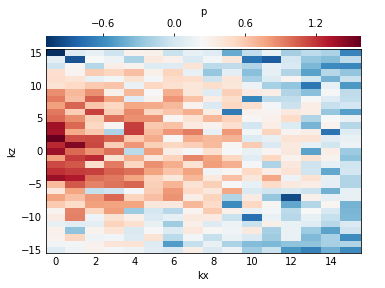

In [33]:
# help(model.solver.state['p'],)

def log_magnitude(xmesh, ymesh, data):
    return xmesh, ymesh, np.log10(np.abs(data))
plot_bot_3d(model.solver.state['p'], 1, 1, func=log_magnitude);